# 3_df 완성 + 시각화

## df 완성

x
1. google trends 데이터   
a. 현대기아 검색어 -> 합산   
b. 경쟁사 검색어 -> 합산  
*2. 가격 데이터 -> 모델마다 판매량 예측할 때.?*
3. 감정분석   
a. 네이버 뉴스 감성사전 이용  
b. 네이버 뉴스 영어 번역 후 감성분석 라이브러리  
c. 해외 뉴스 요약 후 감성분석 라이브러리   
=> 과반수

y  
판매량 데이터  
(export만 할지 domestic+export할지)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

### 감정분석 결과

In [ ]:
sentiment_result = pd.read_csv("/content/gdrive/MyDrive/통계분석실습/기말프로젝트/data/sentiment_result.csv")

In [ ]:
sentiment_result

,month,p_naver,n_naver,pnr_naver,p_foreign,n_foreign,pnr_foreign
0,2023-01,0.33,0.19,1.73,NaN,NaN,NaN
1,2023-02,0.32,0.09,3.52,0.50,0.00,10.00
2,2023-03,0.36,0.10,3.56,0.75,0.25,2.73
3,2023-04,0.39,0.05,7.65,1.00,0.00,20.00
4,2023-05,0.25,0.11,2.25,0.75,0.00,30.00
5,2023-06,0.28,0.04,6.83,0.88,0.12,6.36
6,2023-07,0.36,0.12,2.98,NaN,NaN,NaN
7,2023-08,0.36,0.11,3.24,0.40,0.60,0.65
8,2023-09,0.33,0.12,2.73,1.00,0.00,10.00
9,2023-10,0.30,0.11,2.70,1.00,0.00,20.00


In [ ]:
sentiment_result.dtypes

,0
month,object
p_naver,float64
n_naver,float64
pnr_naver,float64
p_foreign,float64
n_foreign,float64
pnr_foreign,float64


###판매량

In [4]:
sales = pd.read_csv("/content/gdrive/MyDrive/통계분석실습/기말프로젝트/data/hyundai_ev_unit_sales.csv")

In [ ]:
sales

,date,IONIQ6_d,IONIQ6_e,IONIQ5_d,IONIQ5_e,EV6_d,EV6_e,EV9_d,EV9_e
0,202301,23,3818,76,6989,0,6919,0,0
1,202302,1632,4931,1911,7845,1951,6873,0,0
2,202303,2200,6261,1701,7474,3009,8063,0,7
3,202304,1316,3275,2123,7474,2694,6727,0,19
4,202305,1117,3728,2396,8242,1894,7777,0,11
5,202306,491,5913,1297,7723,1379,7838,1334,3
6,202307,488,4065,1350,7215,1398,7647,1251,30
7,202308,400,3217,1061,6725,948,5968,408,2254
8,202309,344,3272,612,6260,601,3706,1163,4852
9,202310,472,2800,1376,7669,1564,4291,833,3957


In [5]:
sales['IONIQ5'] = sales['IONIQ5_e'] + sales['IONIQ5_d']
sales['IONIQ6'] = sales['IONIQ6_e'] + sales['IONIQ6_d']
sales['EV6'] = sales['EV6_e'] + sales['EV6_d']
sales['EV9'] = sales['EV9_e'] + sales['EV9_d']

In [6]:
sales['export'] = sales['EV6_e'] + sales['EV9_e'] + sales['IONIQ5_e'] + sales['IONIQ6_e']

In [7]:
sales['domestic'] = sales['EV6_d'] + sales['EV9_d'] + sales['IONIQ5_d'] + sales['IONIQ6_d']

In [8]:
sales['total'] = sales['export'] + sales['domestic']

In [ ]:
sales

,date,IONIQ6_d,IONIQ6_e,IONIQ5_d,IONIQ5_e,EV6_d,EV6_e,EV9_d,EV9_e,IONIQ5,IONIQ6,EV6,EV9,export,domestic,total
0,202301,23,3818,76,6989,0,6919,0,0,7065,3841,6919,0,17726,99,17825
1,202302,1632,4931,1911,7845,1951,6873,0,0,9756,6563,8824,0,19649,5494,25143
2,202303,2200,6261,1701,7474,3009,8063,0,7,9175,8461,11072,7,21805,6910,28715
3,202304,1316,3275,2123,7474,2694,6727,0,19,9597,4591,9421,19,17495,6133,23628
4,202305,1117,3728,2396,8242,1894,7777,0,11,10638,4845,9671,11,19758,5407,25165
5,202306,491,5913,1297,7723,1379,7838,1334,3,9020,6404,9217,1337,21477,4501,25978
6,202307,488,4065,1350,7215,1398,7647,1251,30,8565,4553,9045,1281,18957,4487,23444
7,202308,400,3217,1061,6725,948,5968,408,2254,7786,3617,6916,2662,18164,2817,20981
8,202309,344,3272,612,6260,601,3706,1163,4852,6872,3616,4307,6015,18090,2720,20810
9,202310,472,2800,1376,7669,1564,4291,833,3957,9045,3272,5855,4790,18717,4245,22962


In [9]:
sales['date'] = pd.to_datetime(sales['date'], format='%Y%m').dt.strftime('%Y-%m')

In [ ]:
sales

,date,IONIQ6_d,IONIQ6_e,IONIQ5_d,IONIQ5_e,EV6_d,EV6_e,EV9_d,EV9_e,IONIQ5,IONIQ6,EV6,EV9,export,domestic,total
0,2023-01,23,3818,76,6989,0,6919,0,0,7065,3841,6919,0,17726,99,17825
1,2023-02,1632,4931,1911,7845,1951,6873,0,0,9756,6563,8824,0,19649,5494,25143
2,2023-03,2200,6261,1701,7474,3009,8063,0,7,9175,8461,11072,7,21805,6910,28715
3,2023-04,1316,3275,2123,7474,2694,6727,0,19,9597,4591,9421,19,17495,6133,23628
4,2023-05,1117,3728,2396,8242,1894,7777,0,11,10638,4845,9671,11,19758,5407,25165
5,2023-06,491,5913,1297,7723,1379,7838,1334,3,9020,6404,9217,1337,21477,4501,25978
6,2023-07,488,4065,1350,7215,1398,7647,1251,30,8565,4553,9045,1281,18957,4487,23444
7,2023-08,400,3217,1061,6725,948,5968,408,2254,7786,3617,6916,2662,18164,2817,20981
8,2023-09,344,3272,612,6260,601,3706,1163,4852,6872,3616,4307,6015,18090,2720,20810
9,2023-10,472,2800,1376,7669,1564,4291,833,3957,9045,3272,5855,4790,18717,4245,22962


In [ ]:
sales = sales.rename(columns={"date":"month"})

In [ ]:
sales.dtypes

,0
month,object
IONIQ6_d,int64
IONIQ6_e,int64
IONIQ5_d,int64
IONIQ5_e,int64
EV6_d,int64
EV6_e,int64
EV9_d,int64
EV9_e,int64
IONIQ5,int64


### google trends 검색어

현대기아

In [ ]:
search1 = pd.read_csv("/content/gdrive/MyDrive/통계분석실습/기말프로젝트/data/hydkia_googletrends.csv", skiprows=2)

In [ ]:
search1

,주,아이오닉 5: (전 세계),아이오닉 6: (전 세계),기아 EV6: (전 세계),기아 EV9: (전 세계)
0,2023-01-01,73,23,77,9
1,2023-01-08,76,26,72,9
2,2023-01-15,89,29,79,8
3,2023-01-22,83,26,72,8
4,2023-01-29,77,62,70,7
...,...,...,...,...,...
95,2024-10-27,72,23,46,40
96,2024-11-03,66,22,47,39
97,2024-11-10,74,23,56,44
98,2024-11-17,85,25,57,47


In [ ]:
search1.dtypes

,0
주,object
아이오닉 5: (전 세계),int64
아이오닉 6: (전 세계),int64
기아 EV6: (전 세계),int64
기아 EV9: (전 세계),int64


In [ ]:
search1['주'] = pd.to_datetime(search1['주'], format="%Y-%m-%d").dt.strftime("%Y-%m")

In [ ]:
search1.columns = ['month', 'IONIQ5', 'IONIQ6', 'EV6', 'EV9']

In [ ]:
search1

,month,IONIQ5,IONIQ6,EV6,EV9
0,2023-01,73,23,77,9
1,2023-01,76,26,72,9
2,2023-01,89,29,79,8
3,2023-01,83,26,72,8
4,2023-01,77,62,70,7
...,...,...,...,...,...
95,2024-10,72,23,46,40
96,2024-11,66,22,47,39
97,2024-11,74,23,56,44
98,2024-11,85,25,57,47


In [ ]:
search1 = search1.groupby('month').sum().reset_index()

In [ ]:
search1

,month,IONIQ5,IONIQ6,EV6,EV9
0,2023-01,398,166,370,41
1,2023-02,277,139,251,30
2,2023-03,269,133,234,134
3,2023-04,339,175,330,114
4,2023-05,254,132,243,77
5,2023-06,260,133,238,100
6,2023-07,412,161,310,121
7,2023-08,271,125,230,107
8,2023-09,265,122,219,101
9,2023-10,332,153,253,133


In [ ]:
search1['total'] = search1['IONIQ5'] + search1['IONIQ6'] + search1['EV6'] + search1['EV9']

In [ ]:
search1

,month,IONIQ5,IONIQ6,EV6,EV9,total
0,2023-01,398,166,370,41,975
1,2023-02,277,139,251,30,697
2,2023-03,269,133,234,134,770
3,2023-04,339,175,330,114,958
4,2023-05,254,132,243,77,706
5,2023-06,260,133,238,100,731
6,2023-07,412,161,310,121,1004
7,2023-08,271,125,230,107,733
8,2023-09,265,122,219,101,707
9,2023-10,332,153,253,133,871


In [ ]:
search1.dtypes

,0
month,object
IONIQ5,int64
IONIQ6,int64
EV6,int64
EV9,int64
total,int64


In [ ]:
search1 = search1.rename(columns={"month":"date"})

경쟁사(테슬라+byd)

In [ ]:
search2 = pd.read_csv("/content/gdrive/MyDrive/통계분석실습/기말프로젝트/data/tslbyd_googletrends.csv", skiprows=2)

In [ ]:
search2['주'] = pd.to_datetime(search2['주'], format="%Y-%m-%d").dt.strftime("%Y-%m")

In [ ]:
search2

,주,테슬라 모델 Y: (전 세계),테슬라 모델 3: (전 세계),BYD Song: (전 세계),BYD Atto 3: (전 세계)
0,2023-01,35,39,1,<1
1,2023-01,73,55,1,<1
2,2023-01,84,62,1,<1
3,2023-01,65,50,1,<1
4,2023-01,58,51,1,<1
...,...,...,...,...,...
95,2024-10,60,51,5,7
96,2024-11,55,51,5,6
97,2024-11,61,53,5,7
98,2024-11,63,54,6,7


In [ ]:
search2.columns = ['month', 'modelY', 'model3', 'Song', 'Atto3']

In [ ]:
search2 = search2.groupby('month').sum().reset_index()

In [ ]:
search2

,month,modelY,model3,Song,Atto3
0,2023-01,315,257,5,<1<1<1<1<1
1,2023-02,201,184,4,<1<1<11
2,2023-03,191,178,4,2223
3,2023-04,307,257,6,33456
4,2023-05,212,187,4,6577
5,2023-06,215,215,8,6777
6,2023-07,282,290,10,77777
7,2023-08,217,276,9,8777
8,2023-09,218,269,9,8788
9,2023-10,276,286,15,87867


In [ ]:
search2.loc[0, "Atto3"] = 3
search2.loc[1, "Atto3"] = 3

In [ ]:
search2['Atto3'] = pd.to_numeric(search2['Atto3'])

In [ ]:
search2['Tesla'] = search2['modelY'] + search2['model3']
search2['BYD'] = search2['Song'] + search2['Atto3']
search2['rival_total'] = search2['Tesla'] + search2['BYD']

In [ ]:
search2

,month,modelY,model3,Song,Atto3,Tesla,BYD,rival_total
0,2023-01,315,257,5,3,572,8,580
1,2023-02,201,184,4,3,385,7,392
2,2023-03,191,178,4,2223,369,2227,2596
3,2023-04,307,257,6,33456,564,33462,34026
4,2023-05,212,187,4,6577,399,6581,6980
5,2023-06,215,215,8,6777,430,6785,7215
6,2023-07,282,290,10,77777,572,77787,78359
7,2023-08,217,276,9,8777,493,8786,9279
8,2023-09,218,269,9,8788,487,8797,9284
9,2023-10,276,286,15,87867,562,87882,88444


In [ ]:
search2.dtypes

,0
month,object
modelY,int64
model3,int64
Song,int64
Atto3,int64
Tesla,int64
BYD,int64
rival_total,int64


In [ ]:
search2 = search2.rename(columns={"month":"date"})

### 가격

In [ ]:
price = pd.read_csv("/content/gdrive/MyDrive/통계분석실습/기말프로젝트/data/ev_prices.csv")

In [ ]:
price

,brand,car,price
0,hyundai,IONIQ 5,41800
1,hyundai,IONIQ 6,37500
2,kia,EV 6,42600
3,kia,EV 9,54900
4,tesla,model Y,44990
5,tesla,model 3,42490


### df 합치기

In [ ]:
google_trends = pd.merge(search1[['month', 'total']], search2[['month', 'Tesla', 'BYD']], on = "month")

In [ ]:
google_trends.columns = ["month", "search_HYDKIA", "search_Telsa", "search_BYD"]

In [ ]:
google_trends

,month,search_HYDKIA,search_Telsa,search_BYD
0,2023-01,975,572,8
1,2023-02,697,385,7
2,2023-03,770,369,2227
3,2023-04,958,564,33462
4,2023-05,706,399,6581
5,2023-06,731,430,6785
6,2023-07,1004,572,77787
7,2023-08,733,493,8786
8,2023-09,707,487,8797
9,2023-10,871,562,87882


In [ ]:
final = pd.merge(sentiment_result, google_trends, on = "month")

In [ ]:
final

,month,p_naver,n_naver,pnr_naver,p_foreign,n_foreign,pnr_foreign,search_HYDKIA,search_Telsa,search_BYD
0,2023-01,0.33,0.19,1.73,NaN,NaN,NaN,975,572,8
1,2023-02,0.32,0.09,3.52,0.50,0.00,10.00,697,385,7
2,2023-03,0.36,0.10,3.56,0.75,0.25,2.73,770,369,2227
3,2023-04,0.39,0.05,7.65,1.00,0.00,20.00,958,564,33462
4,2023-05,0.25,0.11,2.25,0.75,0.00,30.00,706,399,6581
5,2023-06,0.28,0.04,6.83,0.88,0.12,6.36,731,430,6785
6,2023-07,0.36,0.12,2.98,NaN,NaN,NaN,1004,572,77787
7,2023-08,0.36,0.11,3.24,0.40,0.60,0.65,733,493,8786
8,2023-09,0.33,0.12,2.73,1.00,0.00,10.00,707,487,8797
9,2023-10,0.30,0.11,2.70,1.00,0.00,20.00,871,562,87882


In [ ]:
final = pd.merge(final, sales[['month', 'total']], on = "month", how="outer")

In [ ]:
final = final.rename(columns={"total":"HYDKIA_sales"})

In [ ]:
final

,month,p_naver,n_naver,pnr_naver,p_foreign,n_foreign,pnr_foreign,search_HYDKIA,search_Telsa,search_BYD,HYDKIA_sales
0,2023-01,0.33,0.19,1.73,NaN,NaN,NaN,975,572,8,17825.0
1,2023-02,0.32,0.09,3.52,0.50,0.00,10.00,697,385,7,25143.0
2,2023-03,0.36,0.10,3.56,0.75,0.25,2.73,770,369,2227,28715.0
3,2023-04,0.39,0.05,7.65,1.00,0.00,20.00,958,564,33462,23628.0
4,2023-05,0.25,0.11,2.25,0.75,0.00,30.00,706,399,6581,25165.0
5,2023-06,0.28,0.04,6.83,0.88,0.12,6.36,731,430,6785,25978.0
6,2023-07,0.36,0.12,2.98,NaN,NaN,NaN,1004,572,77787,23444.0
7,2023-08,0.36,0.11,3.24,0.40,0.60,0.65,733,493,8786,20981.0
8,2023-09,0.33,0.12,2.73,1.00,0.00,10.00,707,487,8797,20810.0
9,2023-10,0.30,0.11,2.70,1.00,0.00,20.00,871,562,87882,22962.0


In [ ]:
final.to_csv("/content/gdrive/MyDrive/통계분석실습/기말프로젝트/data/final.csv", index=False)

## Linear Regression

final

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/통계분석실습/기말프로젝트/data/final.csv")

In [ ]:
df

,month,p_naver,n_naver,pnr_naver,p_foreign,n_foreign,pnr_foreign,search_HYDKIA,search_Telsa,search_BYD,HYDKIA_sales
0,2023-01,0.33,0.19,1.73,NaN,NaN,NaN,975,572,8,17825.0
1,2023-02,0.32,0.09,3.52,0.50,0.00,10.00,697,385,7,25143.0
2,2023-03,0.36,0.10,3.56,0.75,0.25,2.73,770,369,2227,28715.0
3,2023-04,0.39,0.05,7.65,1.00,0.00,20.00,958,564,33462,23628.0
4,2023-05,0.25,0.11,2.25,0.75,0.00,30.00,706,399,6581,25165.0
5,2023-06,0.28,0.04,6.83,0.88,0.12,6.36,731,430,6785,25978.0
6,2023-07,0.36,0.12,2.98,NaN,NaN,NaN,1004,572,77787,23444.0
7,2023-08,0.36,0.11,3.24,0.40,0.60,0.65,733,493,8786,20981.0
8,2023-09,0.33,0.12,2.73,1.00,0.00,10.00,707,487,8797,20810.0
9,2023-10,0.30,0.11,2.70,1.00,0.00,20.00,871,562,87882,22962.0


### 전처리

결측치 처리  
선형 보간, 맨 끝 값은 선형외삽

In [ ]:
df[['p_foreign', 'n_foreign', 'pnr_foreign']] = df[['p_foreign', 'n_foreign', 'pnr_foreign']].interpolate(method='linear', limit_direction='both')

In [ ]:
df

,month,p_naver,n_naver,pnr_naver,p_foreign,n_foreign,pnr_foreign,search_HYDKIA,search_Telsa,search_BYD,HYDKIA_sales
0,2023-01,0.33,0.19,1.73,0.50,0.00,10.000,975,572,8,17825.0
1,2023-02,0.32,0.09,3.52,0.50,0.00,10.000,697,385,7,25143.0
2,2023-03,0.36,0.10,3.56,0.75,0.25,2.730,770,369,2227,28715.0
3,2023-04,0.39,0.05,7.65,1.00,0.00,20.000,958,564,33462,23628.0
4,2023-05,0.25,0.11,2.25,0.75,0.00,30.000,706,399,6581,25165.0
5,2023-06,0.28,0.04,6.83,0.88,0.12,6.360,731,430,6785,25978.0
6,2023-07,0.36,0.12,2.98,0.64,0.36,3.505,1004,572,77787,23444.0
7,2023-08,0.36,0.11,3.24,0.40,0.60,0.650,733,493,8786,20981.0
8,2023-09,0.33,0.12,2.73,1.00,0.00,10.000,707,487,8797,20810.0
9,2023-10,0.30,0.11,2.70,1.00,0.00,20.000,871,562,87882,22962.0


x 변수 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [ ]:
# # way1) pnr_naver, pnr_foreign: MinMaxScaler([0, 1]), searchHYDKIA, searchTesla: standardscaler, searchBYD: 로그변환
# df[['pnr_naver', 'pnr_foreign']] = minmax_scaler.fit_transform(df[['pnr_naver', 'pnr_foreign']])
# df[['search_HYDKIA', 'search_Telsa']] = standard_scaler.fit_transform(df[['search_HYDKIA', 'search_Telsa']])
# df['search_BYD'] = np.log1p(df['search_BYD'])
# df['HYDKIA_sales'] = np.log1p(df['HYDKIA_sales'])

In [ ]:
# # way2) searchHYDKIA, searchTesla standard scaling, search_BYD는 값의 차이가 크기 때문에 로그 변환
# df[['search_HYDKIA', 'search_Telsa']] = standard_scaler.fit_transform(df[['search_HYDKIA', 'search_Telsa']])
# df['search_BYD'] = np.log1p(df['search_BYD'])

In [ ]:
# way3) pnr_naver, pnr_foreign, searchHYDKIA, searchTesla: standardscaler, searchBYD: 로그변환
df[['pnr_naver', 'pnr_foreign', 'search_HYDKIA', 'search_Telsa']] = standard_scaler.fit_transform(df[['pnr_naver', 'pnr_foreign', 'search_HYDKIA', 'search_Telsa']])
df['search_BYD'] = np.log1p(df['search_BYD'])
df['HYDKIA_sales'] = np.log1p(df['HYDKIA_sales'])

In [ ]:
df

,month,p_naver,n_naver,pnr_naver,p_foreign,n_foreign,pnr_foreign,search_HYDKIA,search_Telsa,search_BYD,HYDKIA_sales
0,2023-01,0.33,0.19,-0.890078,0.50,0.00,0.118804,1.385954,1.402456,2.197225,9.788413
1,2023-02,0.32,0.09,-0.146027,0.50,0.00,0.118804,-1.280850,-1.512944,2.079442,10.132375
2,2023-03,0.36,0.10,-0.129400,0.75,0.25,-0.703431,-0.580574,-1.762390,7.708860,10.265210
3,2023-04,0.39,0.05,1.570694,1.00,0.00,1.249801,1.222876,1.277733,10.418196,10.070230
4,2023-05,0.25,0.11,-0.673929,0.75,0.00,2.380799,-1.194515,-1.294679,8.792094,10.133249
5,2023-06,0.28,0.04,1.229844,0.88,0.12,-0.292879,-0.954694,-0.811377,8.822617,10.165044
6,2023-07,0.36,0.12,-0.370489,0.64,0.36,-0.615779,1.664146,1.402456,11.261742,10.062413
7,2023-08,0.36,0.11,-0.262415,0.40,0.60,-0.938679,-0.935508,0.170816,9.081029,9.951420
8,2023-09,0.33,0.12,-0.474407,1.00,0.00,0.118804,-1.184922,0.077274,9.082280,9.943237
9,2023-10,0.30,0.11,-0.486877,1.00,0.00,1.249801,0.388301,1.246552,11.383762,10.041640


In [ ]:
df['previous_month_sales'] = df['HYDKIA_sales'].shift(1)
df.loc[0, "previous_month_sales"] = 22453

y 변수 스케일링   
로그변환 or 스케일링  
=> 일단 안하고 진행

### 변수 선택

데이터 분리: 시계열 데이터이므로 시간순에 따라 분리

In [ ]:
# from sklearn.model_selection import train_test_split

In [ ]:
train = df[df['month'] <= '2024-06']
test = df[(df['month'] > '2024-06') & (df['month'] < '2024-11')]

In [ ]:
train_X = train.drop(columns=['month', 'HYDKIA_sales'])
train_y = train['HYDKIA_sales']
test_X = test.drop(columns=['month', 'HYDKIA_sales'])
test_y = test['HYDKIA_sales']

In [ ]:
train

,month,p_naver,n_naver,pnr_naver,p_foreign,n_foreign,pnr_foreign,search_HYDKIA,search_Telsa,search_BYD,HYDKIA_sales,previous_month_sales
0,2023-01,0.33,0.19,-0.890078,0.50,0.00,0.118804,1.385954,1.402456,2.197225,9.788413,22453.000000
1,2023-02,0.32,0.09,-0.146027,0.50,0.00,0.118804,-1.280850,-1.512944,2.079442,10.132375,9.788413
2,2023-03,0.36,0.10,-0.129400,0.75,0.25,-0.703431,-0.580574,-1.762390,7.708860,10.265210,10.132375
3,2023-04,0.39,0.05,1.570694,1.00,0.00,1.249801,1.222876,1.277733,10.418196,10.070230,10.265210
4,2023-05,0.25,0.11,-0.673929,0.75,0.00,2.380799,-1.194515,-1.294679,8.792094,10.133249,10.070230
5,2023-06,0.28,0.04,1.229844,0.88,0.12,-0.292879,-0.954694,-0.811377,8.822617,10.165044,10.133249
6,2023-07,0.36,0.12,-0.370489,0.64,0.36,-0.615779,1.664146,1.402456,11.261742,10.062413,10.165044
7,2023-08,0.36,0.11,-0.262415,0.40,0.60,-0.938679,-0.935508,0.170816,9.081029,9.951420,10.062413
8,2023-09,0.33,0.12,-0.474407,1.00,0.00,0.118804,-1.184922,0.077274,9.082280,9.943237,9.951420
9,2023-10,0.30,0.11,-0.486877,1.00,0.00,1.249801,0.388301,1.246552,11.383762,10.041640,9.943237


In [ ]:
test

,month,p_naver,n_naver,pnr_naver,p_foreign,n_foreign,pnr_foreign,search_HYDKIA,search_Telsa,search_BYD,HYDKIA_sales,previous_month_sales
17,2024-06,0.38,0.03,3.486937,1.00,0.00,2.380799,1.098169,1.215371,11.109458,9.659695,9.998707
18,2024-07,0.33,0.07,0.323681,0.73,0.27,-0.720396,-0.302382,-0.686654,9.082961,9.797794,9.659695
19,2024-08,0.24,0.16,-0.989839,0.56,0.44,-0.874212,-0.225640,-0.702245,8.961366,9.310186,9.797794
20,2024-09,0.39,0.10,-0.004699,0.78,0.22,-0.635571,1.376361,0.763250,11.107825,9.477998,9.310186
21,2024-10,0.33,0.20,-0.927488,0.25,0.25,-0.909273,-0.714874,-0.499570,8.809415,9.286097,9.477998


상관분석

In [ ]:
df.columns

Index(['month', 'p_naver', 'n_naver', 'pnr_naver', 'p_foreign', 'n_foreign',
       'pnr_foreign', 'search_HYDKIA', 'search_Telsa', 'search_BYD',
       'HYDKIA_sales'],
      dtype='object')

In [ ]:
corr_columns = ['p_naver', 'n_naver', 'pnr_naver', 'p_foreign', 'n_foreign',
       'pnr_foreign', 'search_HYDKIA', 'search_Telsa', 'search_BYD',
       'HYDKIA_sales']

corr = df[corr_columns].corr()

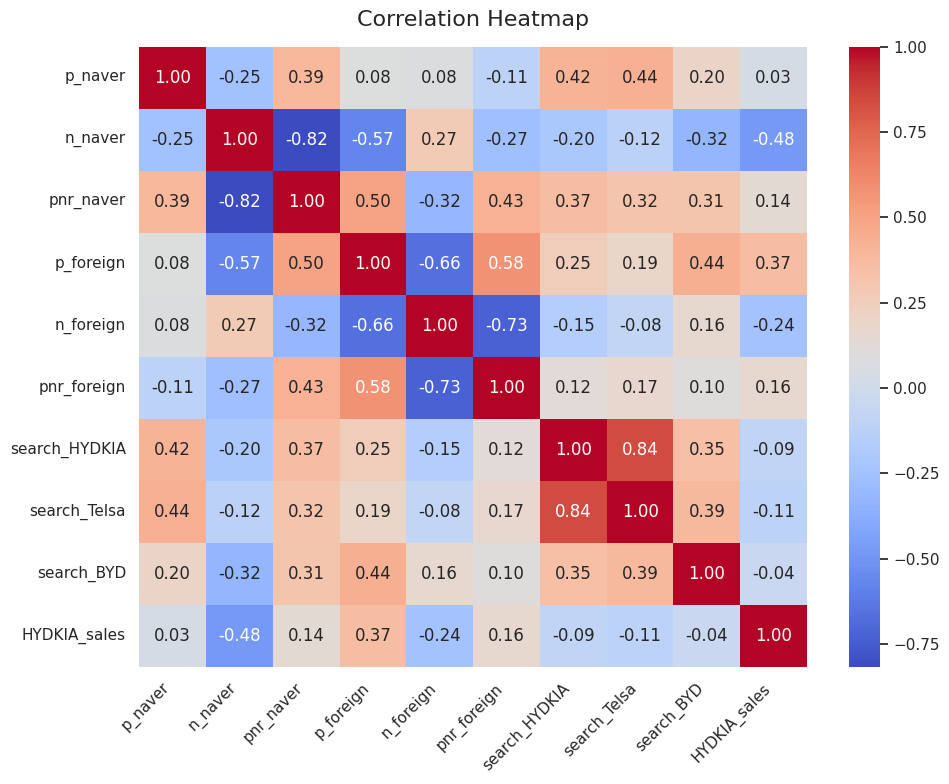

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="white")

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

plt.title("Correlation Heatmap", fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Stepwise Selection

In [ ]:
import statsmodels.api as sm

참고: https://signature95.tistory.com/21

In [ ]:
def stepwise_feature_selection(train_X, train_y, variables=train_X.columns.tolist() ):
    y = train_y ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05

    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서
        ## 선형 모형을 적합한다.
        for col in remainder:
            X = train_X[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]

        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = train_X[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break

            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(train_X[selected_variables])).fit(disp=0).rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    fig = plt.figure(figsize=(20,5))
    fig.set_facecolor('white')

    font_size = 15
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
    plt.plot(steps,adjusted_r_squared, marker='o')

    plt.ylabel('Adjusted R Squared',fontsize=font_size)
    plt.grid(True)
    plt.show()

    return selected_variables

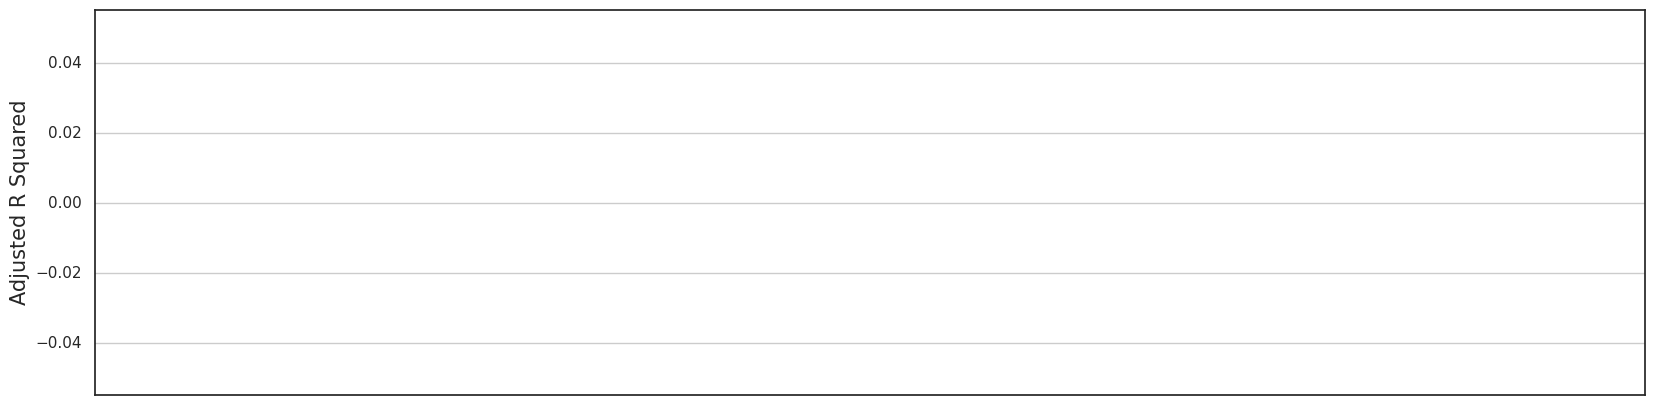

In [ ]:
selected_features = stepwise_feature_selection(train_X, train_y)

In [ ]:
# Stepwise Selection 함수
def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    included = list(initial_list)
    while True:
        changed = False

        # Forward Step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_col in excluded:
            model = sm.OLS(y, sm.add_constant(X[included + [new_col]])).fit()
            new_pval[new_col] = model.pvalues[new_col]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f"Add  {best_feature:>10} with p-value {best_pval:.6f}")

        # Backward Step
        model = sm.OLS(y, sm.add_constant(X[included])).fit()
        pvalues = model.pvalues.iloc[1:]  # Skip the intercept
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            changed = True
            if verbose:
                print(f"Drop {worst_feature:>10} with p-value {worst_pval:.6f}")

        if not changed:
            break

    return included

In [ ]:
stepwise_selection(train_X, train_y, verbose=True)

[]

### 회귀 모델링

OLS

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
model = sm.OLS(train_y, train_X).fit()

In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:           HYDKIA_sales   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              220.8
Date:                Tue, 03 Dec 2024   Prob (F-statistic):                    1.17e-08
Time:                        08:55:10   Log-Likelihood:                         -16.400
No. Observations:                  18   AIC:                                      52.80
Df Residuals:                       8   BIC:                                      61.70
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [ ]:
model = smf.ols("HYDKIA_sales ~ p_naver + search_HYDKIA - 1", data=train).fit()

In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:           HYDKIA_sales   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              815.8
Date:                Tue, 03 Dec 2024   Prob (F-statistic):                    7.91e-17
Time:                        08:56:46   Log-Likelihood:                         -25.307
No. Observations:                  18   AIC:                                      54.61
Df Residuals:                      16   BIC:                                      56.39
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [ ]:
pred_y = model.predict(test_X)

Lasso & Ridge

In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(train_X, train_y)

Lasso(alpha=0.1)

In [ ]:
print("Lasso coefficients: ", lasso.coef_)

Lasso coefficients:  [-0. -0.  0.  0. -0. -0. -0. -0.  0.]


In [ ]:
lasso_pred = lasso.predict(test_X)

In [ ]:
# Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(train_X, train_y)

Ridge(alpha=0.1)

In [ ]:
ridge_pred = ridge.predict(test_X)

모델 평가: RMSE, R^2

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 회귀모델
rmse = np.sqrt(mean_squared_error(test_y, pred_y))
r2 = r2_score(test_y, pred_y)
print(f"RMSE for Linear Regression : {round(rmse, 2)}")
print(f"R Squared for Linear Regression: {round(r2, 2)}")

RMSE for Linear Regression : 1.35
R Squared for Linear Regression: -42.75


In [ ]:
# lasso
lasso_rmse = np.sqrt(mean_squared_error(test_y, lasso_pred))
lasso_r2 = r2_score(test_y, lasso_pred)
print(f"RMSE for Lasso Model: {round(lasso_rmse, 2)}")
print(f"R Squared for Lasso Model: {round(lasso_r2, 2)}")

RMSE for Lasso Model: 0.57
R Squared for Lasso Model: -7.15


In [ ]:
# ridge
ridge_rmse = np.sqrt(mean_squared_error(test_y, ridge_pred))
ridge_r2 = r2_score(test_y, ridge_pred)
print(f"RMSE for Ridge Model : {round(ridge_rmse, 2)}")
print(f"R Squared for Ridge Model : {round(ridge_r2, 2)}")

RMSE for Ridge Model : 0.64
R Squared for Ridge Model : -9.57


## 시각화 for ppt

### sales   
1. 4가지 모델: d, e, total
2. 총 d, e, total

In [ ]:
# 1. 총 4가지 모델에 대해서 d, e, total
def plot_sales(df, model):
  plt.figure(figsize=(12, 6))

  plt.plot(df['date'], df[f'{model}_d'], label='domestic', marker='o', linestyle='-', color='blue')
  plt.plot(df['date'], df[f'{model}_e'], label='export', marker='o', linestyle='-', color='red')
  plt.plot(df['date'], df[f'{model}'], label='total', marker='o', linestyle='-', color='green')

  plt.title(f'Monthly {model} Sales: Domestic, Export, and Total', fontsize=16)
  plt.xlabel('date', fontsize=12)
  plt.ylabel('Sales', fontsize=12)
  plt.xticks(rotation=45)
  plt.grid(True, axis='y', linestyle='--', alpha=0.7)
  plt.legend()

  plt.tight_layout()
  plt.show()

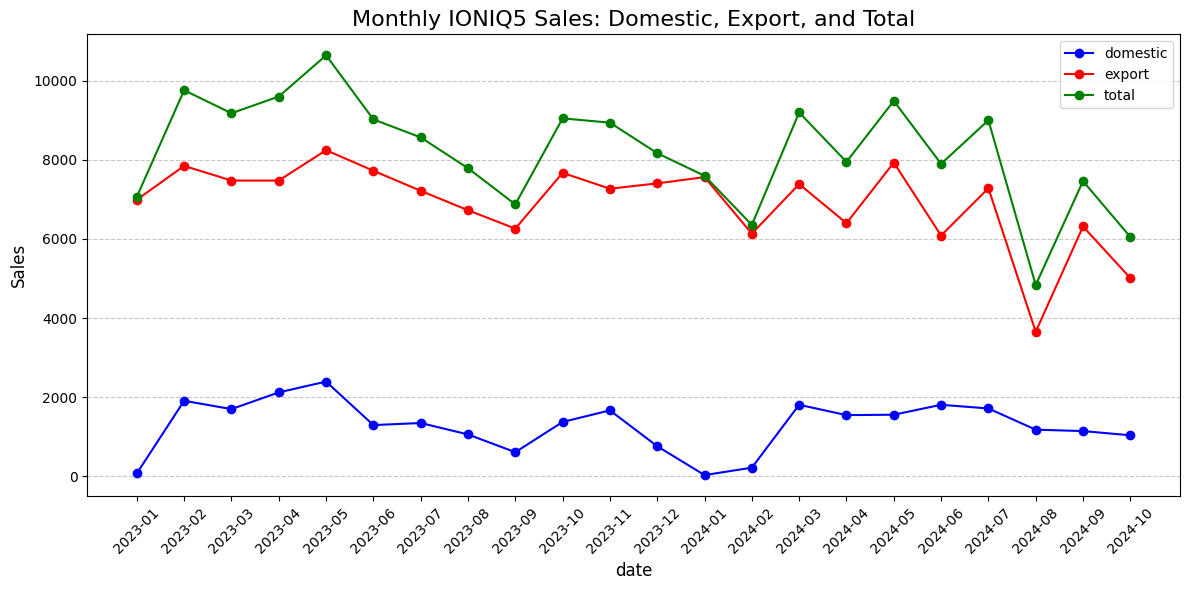

In [ ]:
plot_sales(sales, "IONIQ5")

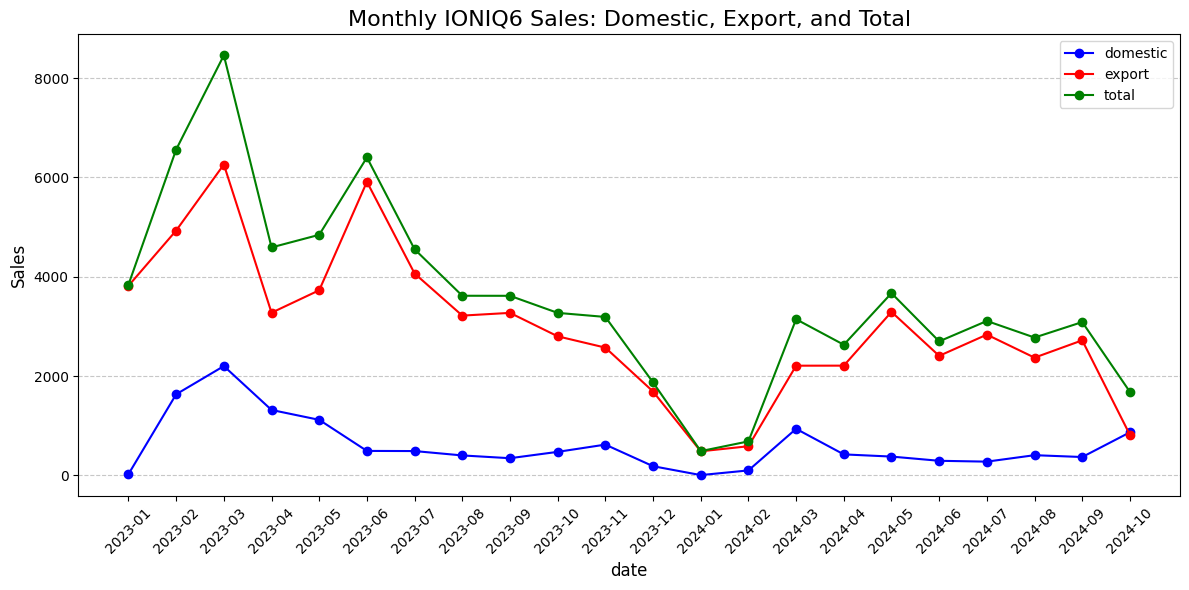

In [ ]:
plot_sales(sales, "IONIQ6")

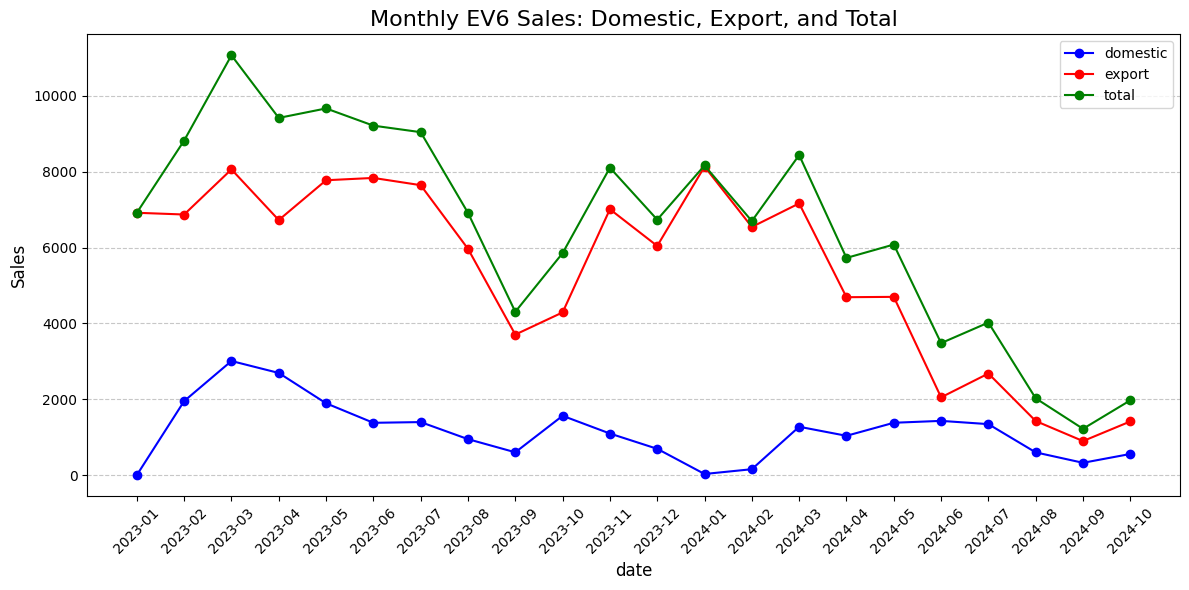

In [ ]:
plot_sales(sales, "EV6")

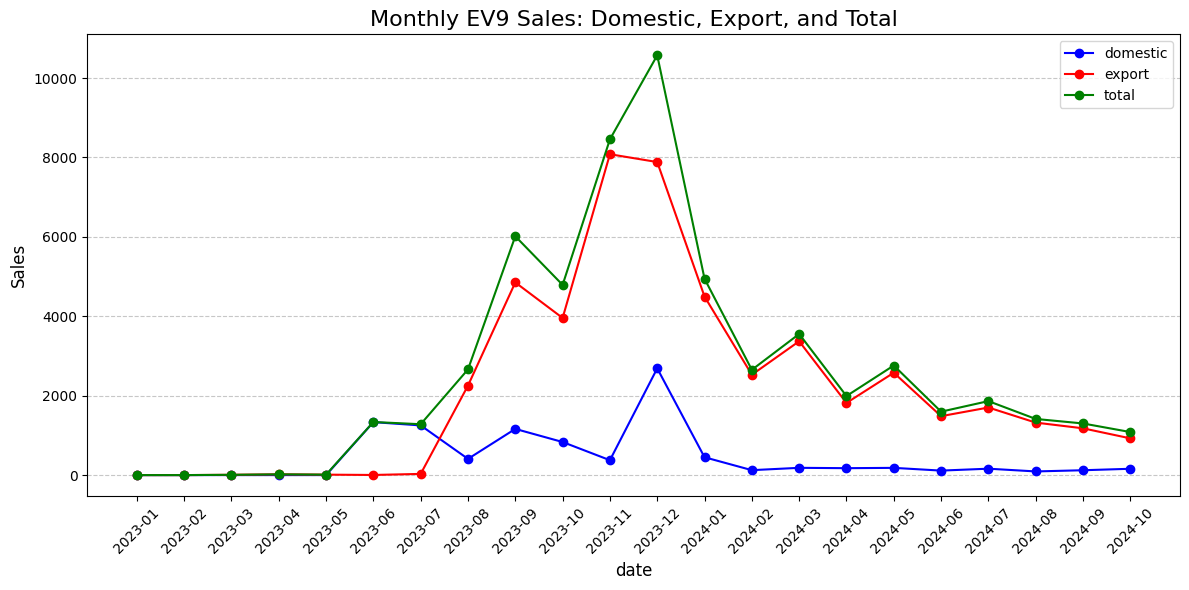

In [ ]:
plot_sales(sales, "EV9")

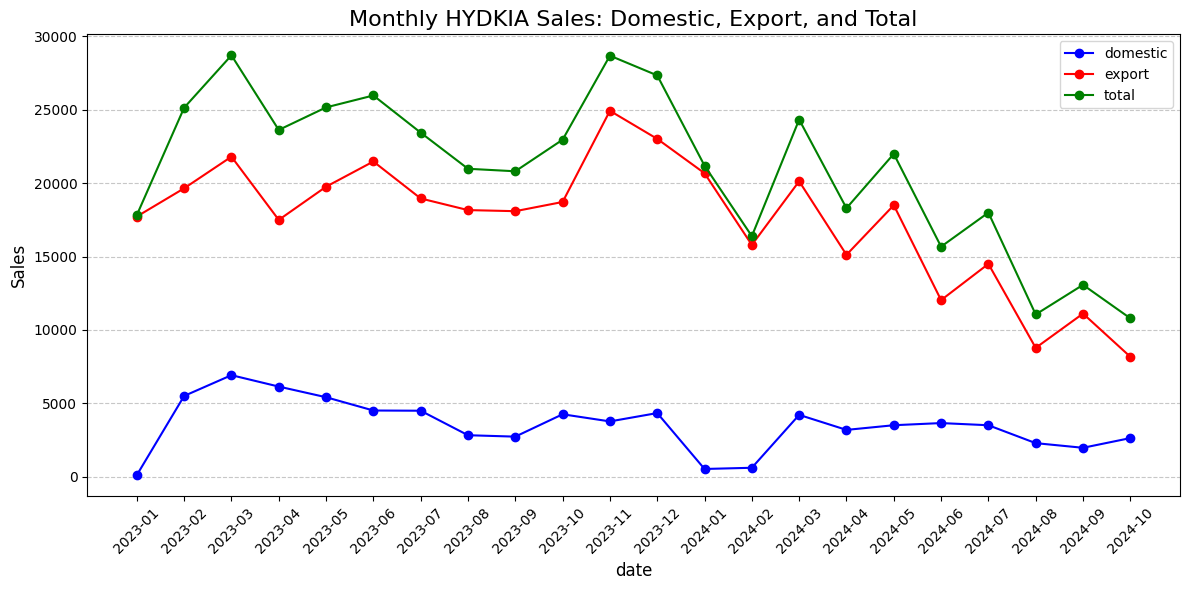

In [ ]:
# 2. 현대기아 total: d, e, total
plt.figure(figsize=(12, 6))

plt.plot(sales['date'], sales['domestic'], label='domestic', marker='o', linestyle='-', color='blue')
plt.plot(sales['date'], sales['export'], label='export', marker='o', linestyle='-', color='red')
plt.plot(sales['date'], sales['total'], label='total', marker='o', linestyle='-', color='green')

plt.title(f'Monthly HYDKIA Sales: Domestic, Export, and Total', fontsize=16)
plt.xlabel('date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

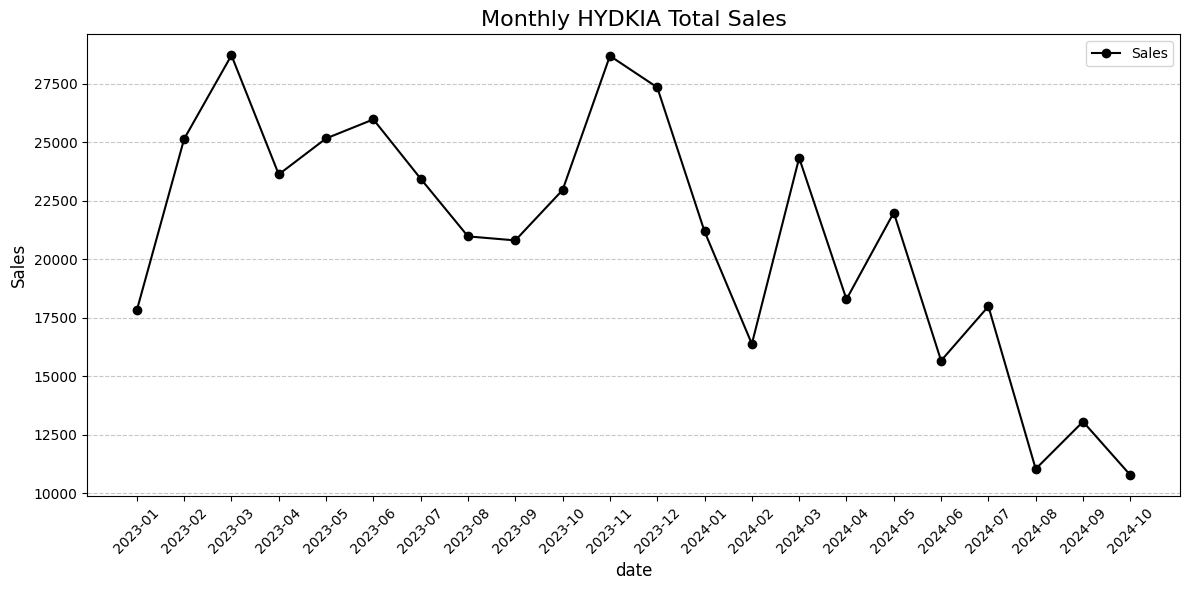

In [11]:
# 2. 현대기아 total: d, e, total
plt.figure(figsize=(12, 6))
plt.plot(sales['date'], sales['total'], label='Sales', marker='o', linestyle='-', color='black')

plt.title(f'Monthly HYDKIA Total Sales', fontsize=16)
plt.xlabel('date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

### google trends   
google trends에서 제공

In [ ]:
# 현대기아 total이랑 tesla랑 byd 비교
s1 = search1[['month', 'total']]
s2 = search2[['month', 'Tesla', 'BYD', 'rival_total']]

s = pd.merge(s1, s2, on="month")

In [ ]:
s

,month,total,Tesla,BYD,rival_total
0,2023-01,975,572,7.5,579.5
1,2023-02,697,385,6.5,391.5
2,2023-03,770,369,2227.0,2596.0
3,2023-04,958,564,33462.0,34026.0
4,2023-05,706,399,6581.0,6980.0
5,2023-06,731,430,6785.0,7215.0
6,2023-07,1004,572,77787.0,78359.0
7,2023-08,733,493,8786.0,9279.0
8,2023-09,707,487,8797.0,9284.0
9,2023-10,871,562,87882.0,88444.0


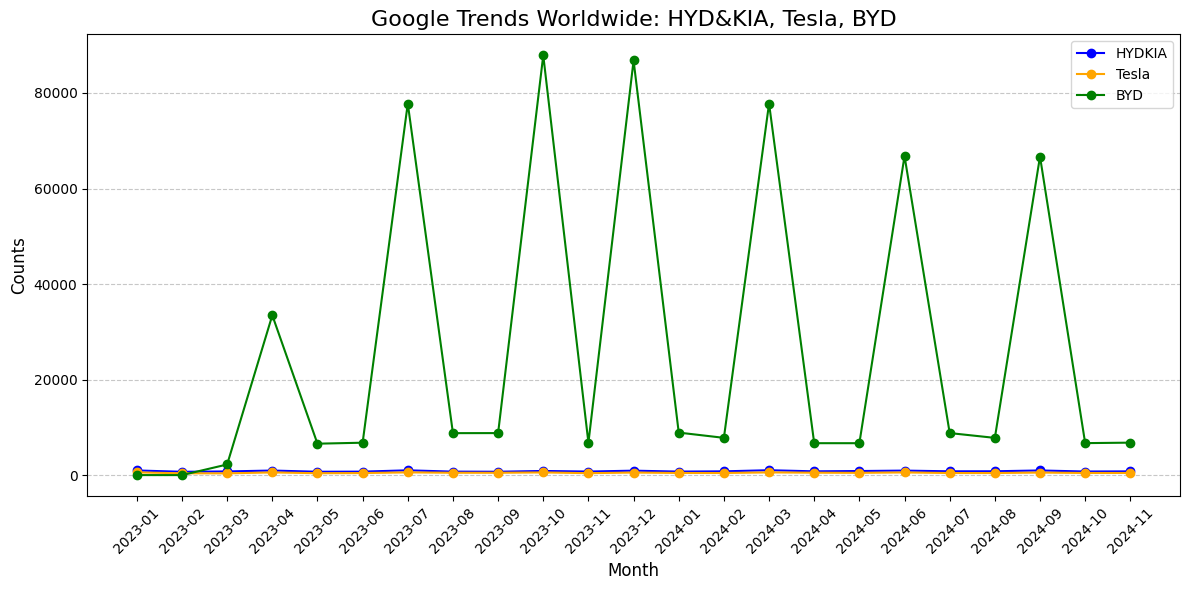

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(s['month'], s['total'], label='HYDKIA', marker='o', linestyle='-', color='blue')
plt.plot(s['month'], s['Tesla'], label='Tesla', marker='o', linestyle='-', color='orange')
plt.plot(s['month'], s['BYD'], label='BYD', marker='o', linestyle='-', color='green')

plt.title('Google Trends Worldwide: HYD&KIA, Tesla, BYD', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.legend()

plt.tight_layout()

plt.show()

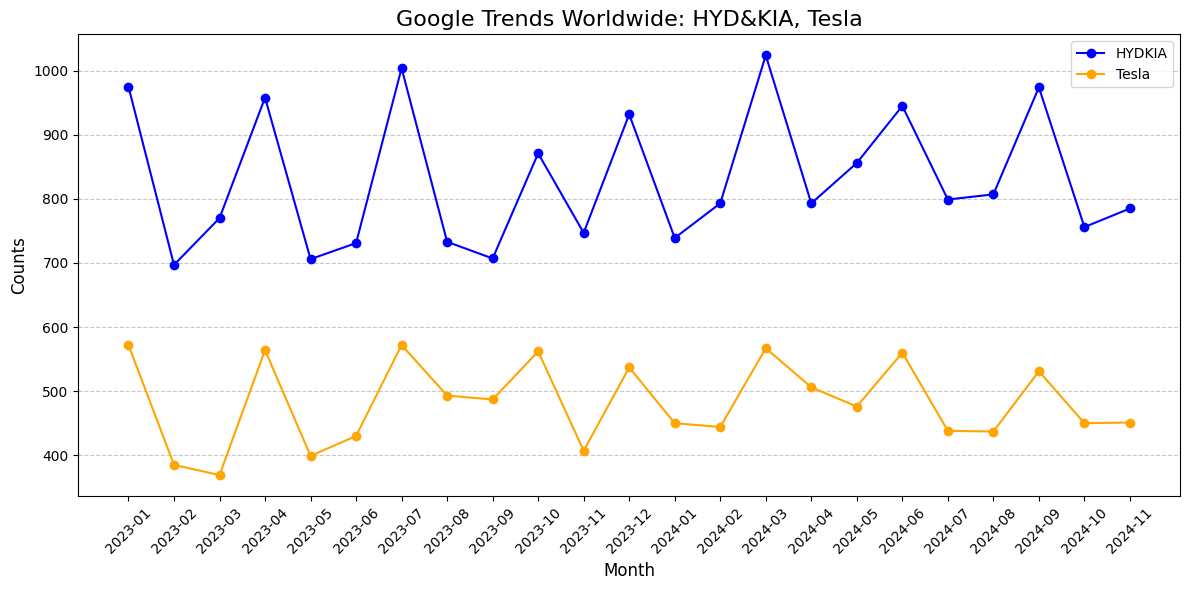

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(s['month'], s['total'], label='HYDKIA', marker='o', linestyle='-', color='blue')
plt.plot(s['month'], s['Tesla'], label='Tesla', marker='o', linestyle='-', color='orange')
# plt.plot(s['month'], s['BYD'], label='BYD', marker='o', linestyle='-', color='green')

plt.title('Google Trends Worldwide: HYD&KIA, Tesla', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.legend()

plt.tight_layout()

plt.show()

### 판매량&검색어

In [ ]:
sales = sales.rename(columns = {"month":"date"})

In [ ]:
search_ = pd.merge(search1, search2[['date', 'Tesla']], on="date", how="outer")

In [ ]:
search_.columns = ['date', 'search_IONIQ5', 'search_IONIQ6', 'search_EV6', 'search_EV9', 'search_HYDKIA', 'search_Tesla']

In [ ]:
sales_ = sales[['date', 'IONIQ5', 'IONIQ6', 'EV6', 'EV9', 'total']]
sales_.columns = ['date', 'sales_IONIQ5', 'sales_IONIQ6', 'sales_EV6', 'sales_EV9', 'sales_HYDKIA']

In [ ]:
sales_search = pd.merge(sales_, search_, on="date", how="inner")

In [ ]:
sales_search

,date,sales_IONIQ5,sales_IONIQ6,sales_EV6,sales_EV9,sales_HYDKIA,search_IONIQ5,search_IONIQ6,search_EV6,search_EV9,search_HYDKIA,search_Tesla
0,2023-01,7065,3841,6919,0,17825,398,166,370,41,975,572
1,2023-02,9756,6563,8824,0,25143,277,139,251,30,697,385
2,2023-03,9175,8461,11072,7,28715,269,133,234,134,770,369
3,2023-04,9597,4591,9421,19,23628,339,175,330,114,958,564
4,2023-05,10638,4845,9671,11,25165,254,132,243,77,706,399
5,2023-06,9020,6404,9217,1337,25978,260,133,238,100,731,430
6,2023-07,8565,4553,9045,1281,23444,412,161,310,121,1004,572
7,2023-08,7786,3617,6916,2662,20981,271,125,230,107,733,493
8,2023-09,6872,3616,4307,6015,20810,265,122,219,101,707,487
9,2023-10,9045,3272,5855,4790,22962,332,153,253,133,871,562


In [ ]:
def sales_search_plot(df, name):
  fig, ax1 = plt.subplots(figsize=(12, 6))

  ax1.plot(df['date'], df[f"sales_{name}"], label='Sales', marker='o', linestyle='-', color='black')
  ax1.set_ylabel('Sales', fontsize=12, color="black")
  ax1.tick_params(axis="y", labelcolor="black")
  ax1.grid(True, axis="y", linestyle="--", alpha=0.7)

  ax2 = ax1.twinx()
  ax2.plot(df['date'], df[f"search_{name}"], label='Search', marker='o', linestyle='-', color='blue')
  ax2.set_ylabel('Search', fontsize=12, color='blue')
  ax2.tick_params(axis='y', labelcolor='blue')

  ax1.set_title(f'{name} Sales & Search', fontsize=16)
  ax1.set_xlabel('Date', fontsize=12)

  ax1.set_xticks(df['date'])
  ax1.set_xticklabels(df['date'], rotation=45, ha='right')

  fig.legend()

  plt.tight_layout()
  plt.show()

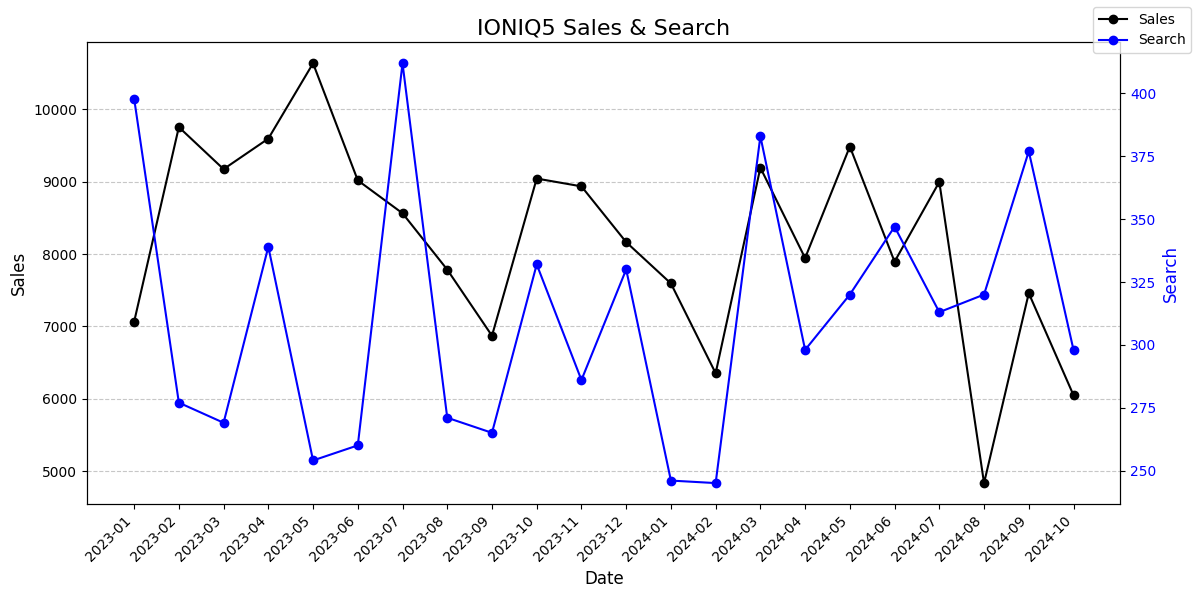

In [ ]:
sales_search_plot(sales_search, "IONIQ5")

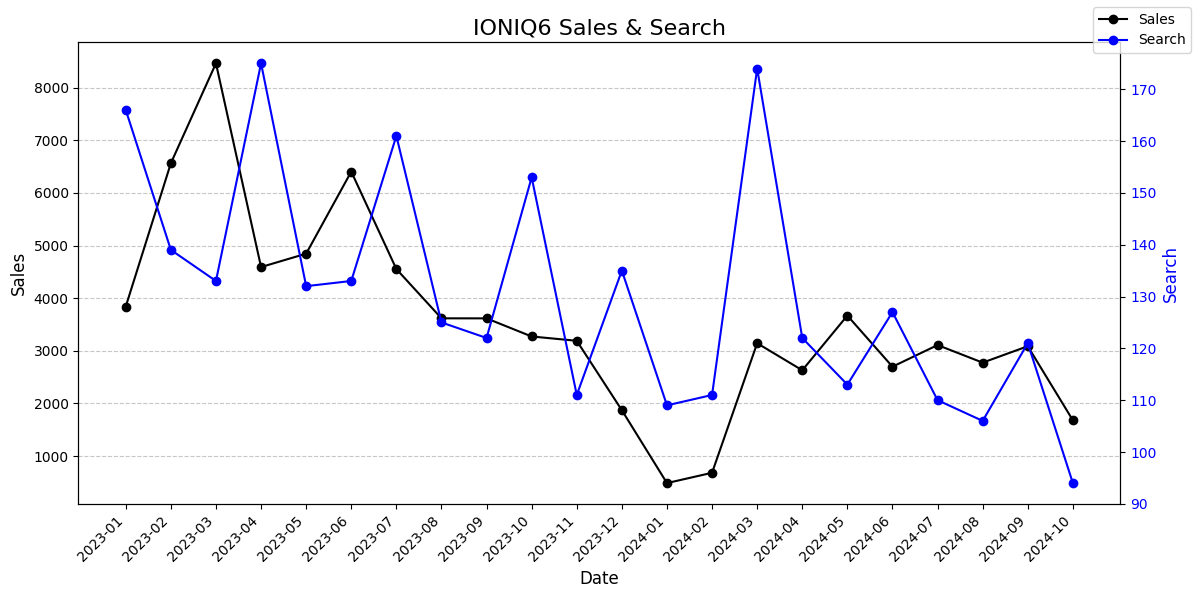

In [ ]:
sales_search_plot(sales_search, "IONIQ6")

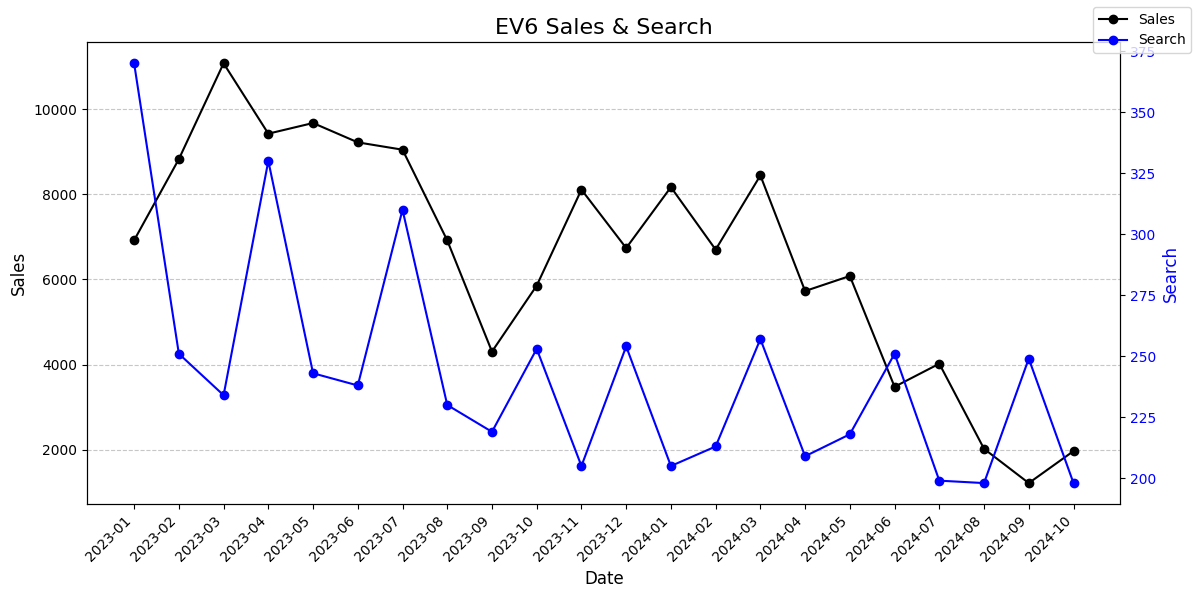

In [ ]:
sales_search_plot(sales_search, "EV6")

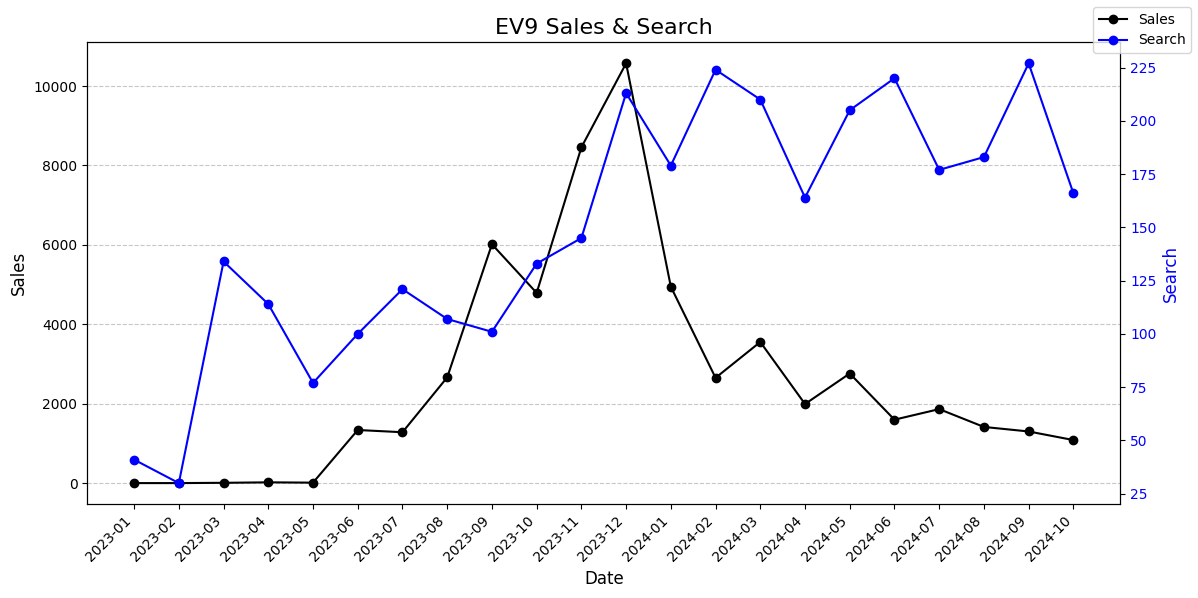

In [ ]:
sales_search_plot(sales_search, "EV9")

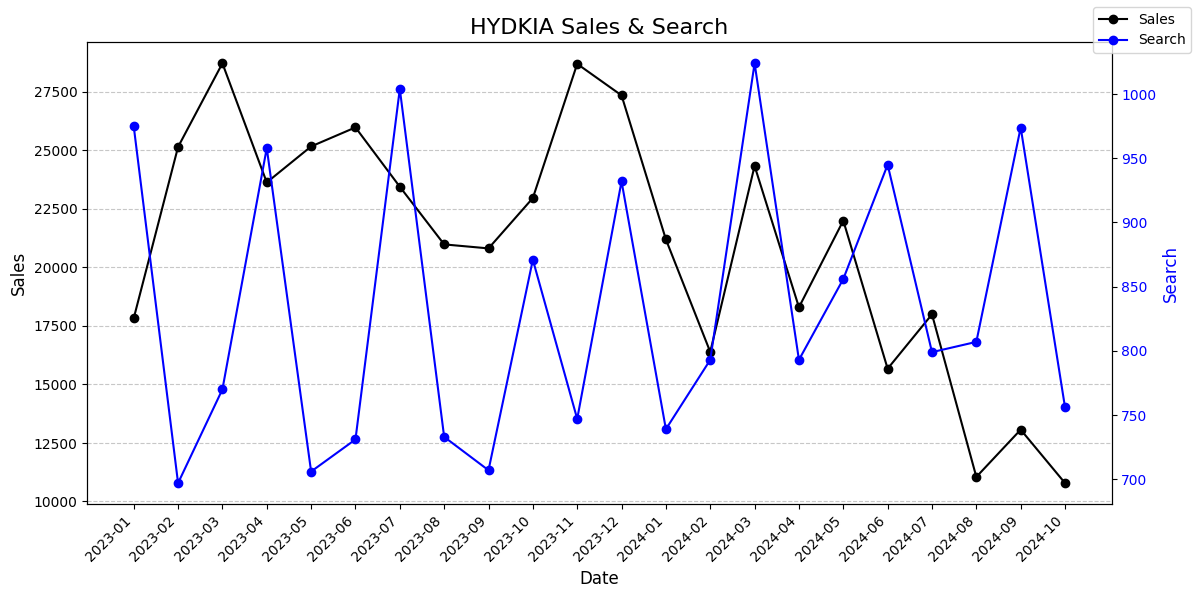

In [ ]:
sales_search_plot(sales_search, "HYDKIA")

### price   
가격 내림차순 barplot

In [ ]:
price = price.sort_values('price', ascending=False)
price['brand'] = price['brand'].str.upper()
price['brand_car'] = price['brand'] + ' ' + price['car']

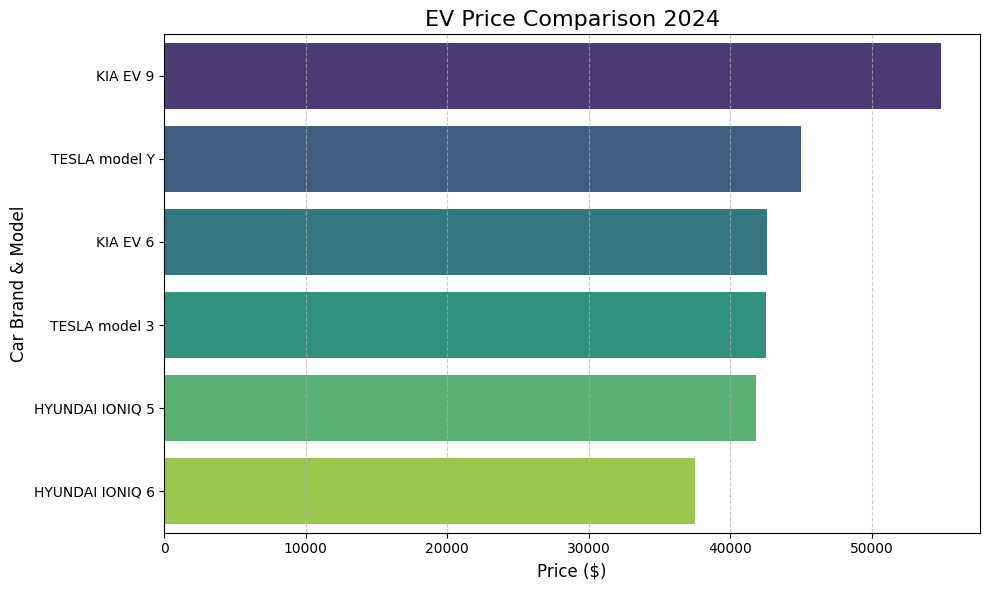

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(data=price, x='price', y="brand_car", palette="viridis")

plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.title("EV Price Comparison 2024", fontsize=16)
plt.xlabel("Price ($)", fontsize=12)
plt.ylabel("Car Brand & Model", fontsize=12)
plt.tight_layout()

plt.show()

### linear regression 결과